# Subset Timeseries by Dates Python using Pandas

## Temporally subset data using pandas dataframes

Sometimes a dataset contains a much larger timeframe than you need for your analysis or plot, and it can be helpful to select, or subset, the data to the needed timeframe.

There are many ways to subset the data temporally in Python; one easy way to do this is using pandas.

Pandas natively understands time operations if:
1. You tell it what column contains your time stamps (using the parameter parse_dates) and
2. You set the date column to be the index of the dataframe (using the parameter index_col).

On the previous page of this chapter, you already learned how to complete these steps during the read_csv() import into the pandas dataframe. On this page, you will learn how to use the datetime index to subset data from pandas dataframe.

### Import packages and get data

You will use a slightly modifie dversion of precipitation data (inches) downloaded from the NCEI COOP station 050843 in Boulder, CO.

Your instructor has modified these data as follows:
- aggregated the data to represent daily sum values.
- added some no data values to allow you to practice handling missing data
- added new columns to this data that wouldnot usually be there if you downloaded it directly:
    - Year
    - Julian day

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

### Download curated dataset from Earthpy

You will also download data from earthpy by specifying a data key for the dataset called colorado-flood. This dataset include the precipitation data collected for 2003-2013 for Boulder, CO.

In [2]:
# Download the data
data = et.data.get_data("colorado-flood")

For this dataset, there is a precipitation subdir within colorado-flood for the precipitation data.

In [3]:
# Set working dir
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Define relative path to file with daily precip total
file_path = os.path.join("data", "colorado-flood",
                        "precipitation",
                        "805325-precip-dailysum-2003-2013.csv")

Now that you have downloaded the dataset, you can import the file for the measurement station for Boulder, CO, and specify the:
1. no data values using the parameter na_values
2. date columns using the parameter parse_dates
3. datetime index using the parameter index_col

In [4]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                      parse_dates=["DATE"],
                                      index_col=["DATE"],
                                      na_values=["999.99"])

# View the first few rows
boulder_precip_2003_2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


### About the precipitation data

Viewing the structure of these data, you can see that different types of data are included in this file.
- STATION and STATION_NAME: Identification of the COOP station.
- ELEVATION, LAT and LONG: The spatial location of the station.
- DAILY_PRECIP: The total precipitation in inches. The metadata for this dataset notes that the value 999.99 indicates missing data. Also important, days with no precipitation are not included in the data.
- YEAR: the year the data were collected
- JULIAN: the JULIAN DAY the data were collected.

DATE is the date when the data were collected in the format: YYYY-MM-DD.

Notice that DATE is now the index value because you used the parse_date and index_Col parameters when you imported the CSV file into a pandas dataframe.

The metadata tell us that no data value for these data is 999.99. IMPORTANT: your instructor has modified these data a bit for ease of teaching and learning. Specifically, data have been aggregated to represent daily sum values and some no data values have been added.

Even after reading documentation, it is always a good idea to explore the data before working with them such as:
1. checking out the data types
2. calculating the summary stats to get a sense of the data values (and make sure that "no data" value have been identified)
3. checking out the values in the datetime index.

In [5]:
# View dataframe info
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2003-01-01 to 2013-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_PRECIP  788 non-null    float64
 1   STATION       792 non-null    object 
 2   STATION_NAME  792 non-null    object 
 3   ELEVATION     792 non-null    float64
 4   LATITUDE      792 non-null    float64
 5   LONGITUDE     792 non-null    float64
 6   YEAR          792 non-null    int64  
 7   JULIAN        792 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.7+ KB


In [6]:
# View summary stats
boulder_precip_2003_2013.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,788.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,0.247843,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,0.462558,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,9.800000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [7]:
# View index values of dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01', '2003-01-05', '2003-02-01', '2003-02-02',
               '2003-02-03', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-10', '2003-02-18',
               ...
               '2013-11-01', '2013-11-09', '2013-11-21', '2013-11-27',
               '2013-12-01', '2013-12-04', '2013-12-22', '2013-12-23',
               '2013-12-29', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=792, freq=None)

## Subset pandas dataframe by year

Because you have a dataframe set up with an index, you can start to easily subset your data using the syntax:

df["index_date"]

Note that the datetime index value is accessed using quotation marks "" similar to how you query for text strings.

Using this syntax, you can select all of the data for the year 2013 by specifying the value that you want ot select from the datetime index:

In [8]:
# Select 2013 data - view first few records
boulder_precip_2003_2013["2013"].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [9]:
# Select 2013 data - view last few records
boulder_precip_2003_2013["2013"].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


Note that in the previous example, you are querying the datetime index directly, not querying the values from the Year column.

## Subset pandas dataframe by month

Using a datetime index with pandas makes it really easy to continue to select data using additional attributes of the index such as month.

This attribute of the datetime index can be accessed as:

df.index.month == value

where the month values are numeric values ranging from 1 to 12, representing Jan through Dec.

With this attribute, you can now employ the pandas syntax to filter values in a pandas dataframe using the syntax:

df[df.index.month == value]

In [10]:
# Select all Dec data - view first few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,335
2004-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,336
2004-12-22,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,357
2004-12-24,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,359
2005-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,335


In [11]:
# Select all Dec data - view last few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


## Subset pandas dataframe by day of month

Similarly, you can attribute day of the index to select all records for a specific day of the month as follows:

df.index.month == value

where the month values are numeric values ranging from 1 to 31, representing possible days of the month.

In [12]:
# Select data for 1st of month - view first rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.day == 1]

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,60
2003-04-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,91
2003-05-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,121
...,...,...,...,...,...,...,...,...
2013-08-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,213
2013-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,244
2013-10-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,274


## Subset pandas dataframes using ranges of dates

You can also subset the data using a specific date range using the syntax:

df["begin_index_date":"end_index_date]

In [13]:
# Subset data to May-Aug 2005
precip_may_aug_2005 = boulder_precip_2003_2013["2005-05-01":"2005-08-31"]

precip_may_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152


### Check Min and Max values of index

In [14]:
# Check min value of index
print(precip_may_aug_2005.index.min())

# Check max value of index
print(precip_may_aug_2005.index.max())

2005-05-01 00:00:00
2005-08-23 00:00:00


## Plot temporal subsets from pandas dataframe

Once you have subsetted the data and saved it, you can plot the data from the new dataframe to focus in on the desired time period.

Once again, you will use .index.values to access the datetime index values for the plot

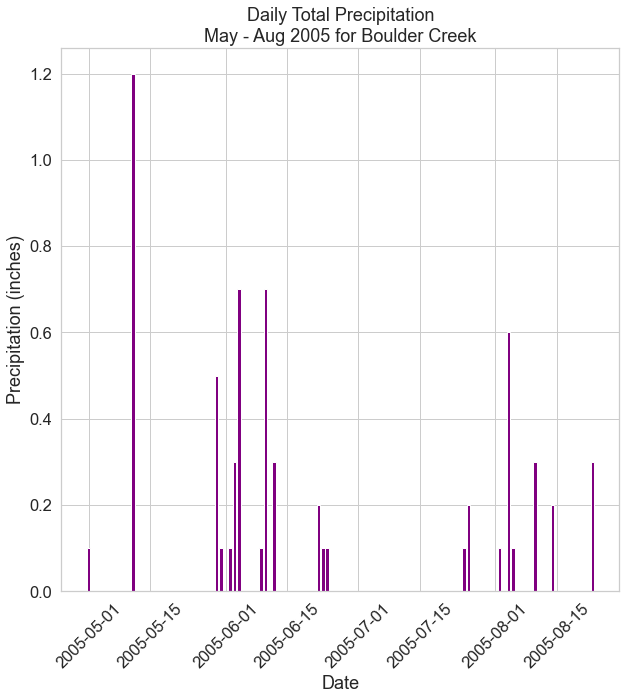

In [15]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(precip_may_aug_2005.index.values,
      precip_may_aug_2005["DAILY_PRECIP"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nMay - Aug 2005 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)


plt.show()